In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
with open("hungarian_text_0.txt", encoding="utf-8") as f:
    text = f.read()

In [5]:
print(text[:1000])

Cégünk, az Autócentrum Szabó Kft., alkatrész webáruházában gyári alkatrészekhez juthat hozzá kedvezményes áron. A webáruházunkban történő bejelentkezés után azonnal lehetőség nyílik a gyári alkatrészeknek megtekintésére és megrendelésére.
Achilles Duguláselhárítás - Éjjel-nappal Duguláselhárítás Budapest és Pest megyében
Több izzós modern lámpa függeszték nappaliba - HOLLY SP3 OTTONE SATINATO - Ideal Lux - 231600 - 231600 Budajenő
Körülnéztünk a tanszerpiacon, megkérdeztük a szülőket is. Van 199 forintos filctollkészlet és 1600 forintos is, lehet választani.
Átlagosan 85 liter sört fogyasztott tavaly egy romániai lakos
A technikai SEO esetében különösen igaz a folyamatos változás.
akkor javaslom, hogy a munkádban inkább a teljesítménybérezést válaszd, mint az óradíjat – ez anyagilag sokkal megtérülőbb számodra. :)
Illeszkedik a legtöbb haj hajcsavarók : ezek a klipek fantasztikmint a csere, az elveszett vagy sérült bilincsek, valamint kompatibilis a használata, a legtöbb kicsi, közepes

Text(0.5, 1.0, 'Histogram of line lengths')

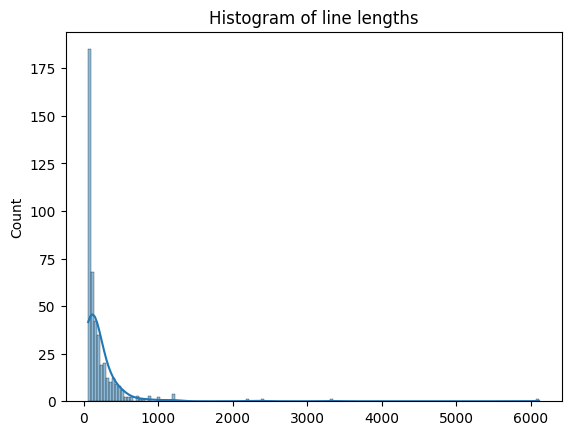

In [16]:
sns.histplot([len(i) for i in text[:100000].splitlines()], kde=True)
plt.title("Histogram of line lengths")

Text(0.5, 1.0, 'Histogram of line lengths on log scale')

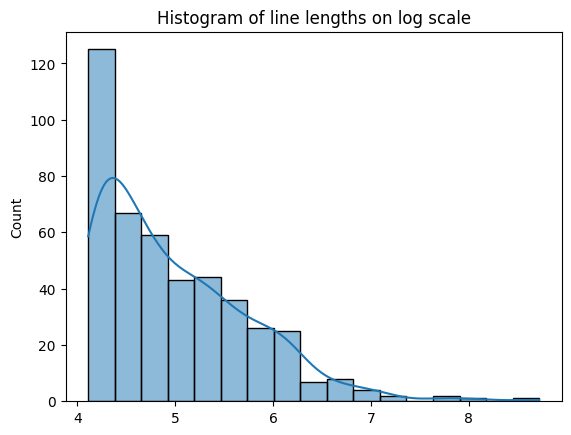

In [40]:
sns.histplot([np.log(len(i)) for i in text[:100000].splitlines()], kde=True)
plt.title("Histogram of line lengths on log scale")

In [39]:
print(f"Mean string length: {np.mean([len(i) for i in text[:100000].splitlines()])}")
print(f"Max string length: {np.max([len(i) for i in text[:100000].splitlines()])}")
print(f"Min string length: {np.min([len(i) for i in text[:100000].splitlines()])}")

Mean string length: 221.22444444444446
Max string length: 6109
Min string length: 61


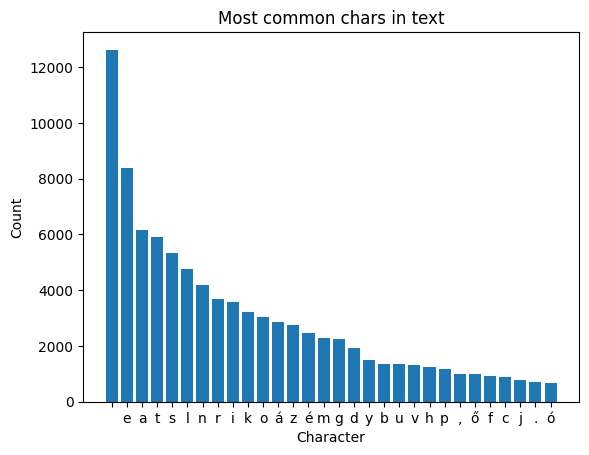

In [23]:
import collections
TOP_K = 30

# Count the occurrences of each character
counter = collections.Counter(text[:100000])

# Get the characters and their counts as separate lists
characters = list(counter.keys())
counts = list(counter.values())

# Sort the characters and counts in descending order
indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)
characters = [characters[i] for i in indices]
counts = [counts[i] for i in indices]

# Plot the result
plt.bar(characters[:TOP_K], counts[:TOP_K])
plt.xlabel("Character")
plt.ylabel("Count")
plt.title("Most common chars in text")
plt.show()


c:\Users\takat\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\takat\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


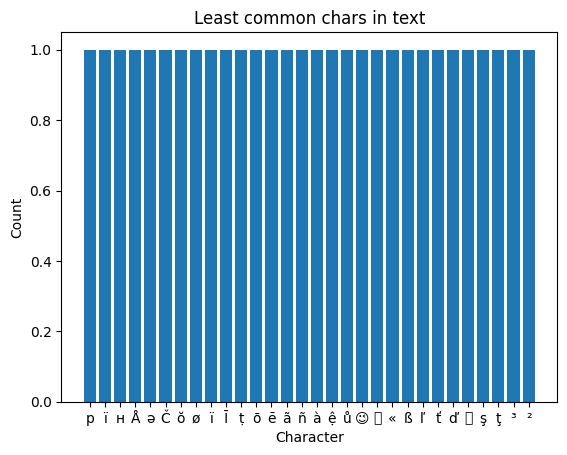

In [24]:
# Plot the result
plt.bar(characters[-TOP_K:], counts[-TOP_K:])
plt.xlabel("Character")
plt.ylabel("Count")
plt.title("Least common chars in text")
plt.show()

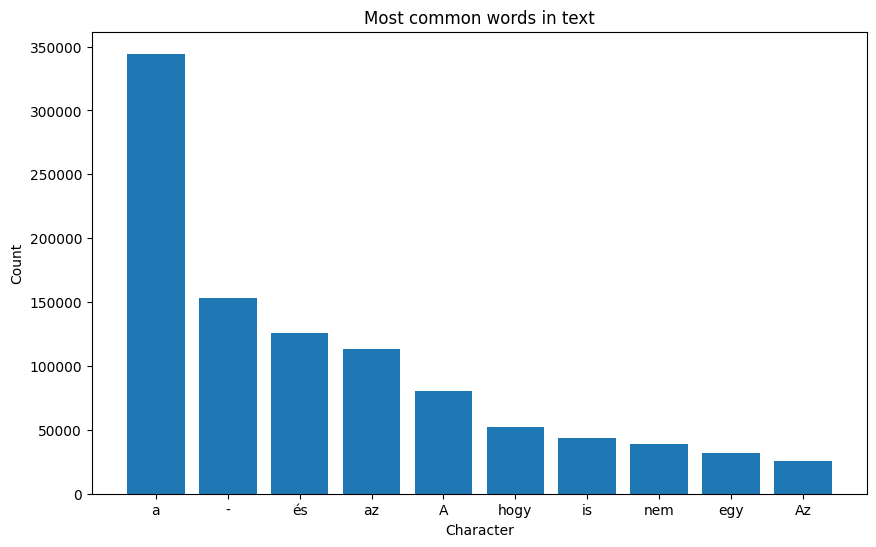

In [41]:
TOP_K = 10

# Count the occurrences of each character
counter = collections.Counter(text[:100000000].split())

# Get the characters and their counts as separate lists
characters = list(counter.keys())
counts = list(counter.values())

# Sort the characters and counts in descending order
indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)
characters = [characters[i] for i in indices]
counts = [counts[i] for i in indices]

plt.figure(figsize=(10, 6))
# Plot the result
plt.bar(characters[:TOP_K], counts[:TOP_K])

plt.xlabel("Character")
plt.ylabel("Count")
plt.title("Most common words in text")
plt.show()

In [53]:
from datasets import load_dataset

dataset = load_dataset('text', data_dir="data", streaming=True)


Using custom data configuration default-12d058f59feabf05


In [55]:
dataset

{'train': <datasets.iterable_dataset.IterableDataset at 0x22eadf6bc10>}

In [56]:
dataset = load_dataset('text', data_dir="data")


Using custom data configuration default-12d058f59feabf05
Found cached dataset text (C:/Users/takat/.cache/huggingface/datasets/text/default-12d058f59feabf05/0.0.0/21a506d1b2b34316b1e82d0bd79066905d846e5d7e619823c0dd338d6f1fa6ad)
100%|██████████| 1/1 [00:00<00:00, 30.41it/s]


In [57]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 496178
    })
})

In [64]:
from huggingface_hub import notebook_login


In [68]:
notebook_login()

In [82]:
dataset = load_dataset('hakatiki/CcHuText', streaming=True)
iterator = iter(dataset["train"])

Using custom data configuration hakatiki--CcHuText-535efbcb467c1354


In [83]:
for i in range(10):
    print(next(iterator))

{'text': 'Az 5 legfontosabb HandBrake alternatíva a videó formátum konvertálásához és a DVD-fájlok másolásához'}
{'text': 'Rendeléssel kapcsolatban keresd az Ügyfélszolgálatunkat e-mailben:'}
{'text': 'Olvasónk, Csaba írása A Ganzo G 743 -as modellje ránézésre annyira jól sikerült, hogy majdnem összeveszejtett egy barátommal, aki, mivel szerinte úgyis rengeteg késem van, el merészelte kérni tőlem, pedig nem is gyűjtő. A dolog ott kezdődik, hogy nincs rengeteg késem, csak pár száz és négy kard. Ott folytatódik, hogy még azt is kicsit ...'}
{'text': 'A tudatosság tudatára ébredés: a belső csend megjelenése. Bármilyen zavaró zaj ugyanannyit segíthet, mint a csend. Ha felhagysz a zajjal szemben kialakult belső viszolygásoddal, ha hagyod azt olyannak lenni, amilyen, akkor ez az elfogadás is eljuttat a lelki béke birodalmába, ami a belső csend. Valahányszor mélyen elfogadod a jelen pillanatot olyannak, amilyen - bármilyen formában is mutatkozzék -, nyugodt vagy, lelki békét érzel. Figyelj a 